In [1]:
# import some basic libraries for Exploratory Data Analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load only the "all_parkruns" sheet
df_all = pd.read_excel("parkrun_data_sample.xlsx", sheet_name="all_parkruns")

# Preview structure
df_all.sample(2)


,Laps,Time,Cumulative Time,Distancekm,Avg Pacemin/km,Avg GAPmin/km,Avg HRbpm,Max HRbpm,Total Ascentm,Total Descentm,...,Avg Vertical Oscillationcm,Avg Vertical Ratio%,CaloriesC,Avg Temperature,Best Pacemin/km,Max Run Cadencespm,Moving Time,Avg Moving Pacemin/km,Avg Step Speed Losscm/s,Avg Step Speed Loss Percent%
28,mosman_parkrun_6,00:00:03.300000,1900-01-01 03:03:00,0.01,05:52:00,05:01:00,173,174,0,0,...,10.6,8.1,1,NaN,05:01:00,153,00:02:00,03:35:00,NaN,NaN
23,mosman_parkrun_1,00:05:18.800000,00:05:18.800000,1.00,05:19:00,05:17:00,141,158,11,11,...,9.8,8.3,72,NaN,04:18:00,167,05:12:00,05:12:00,NaN,NaN


In [14]:
print(df_all.columns.tolist())

df_revised = df_all[df_all["Lap"] != 6]


['Laps', 'Time', 'Cumulative Time', 'Distancekm', 'Avg Pacemin/km', 'Avg GAPmin/km', 'Avg HRbpm', 'Max HRbpm', 'Total Ascentm', 'Total Descentm', 'Avg PowerW', 'Avg W/kg', 'Max PowerW', 'Max W/kg', 'Avg Run Cadencespm', 'Avg Ground Contact Timems', 'Avg GCT Balance%', 'Avg Stride Lengthm', 'Avg Vertical Oscillationcm', 'Avg Vertical Ratio%', 'CaloriesC', 'Avg Temperature', 'Best Pacemin/km', 'Max Run Cadencespm', 'Moving Time', 'Avg Moving Pacemin/km', 'Avg Step Speed Losscm/s', 'Avg Step Speed Loss Percent%', 'Avg Pace', 'Avg Pace (s)', 'Avg Pace (mm:ss)', 'Lap Time (s)', 'Parkrun', 'Lap']


C:\Users\tj92a\AppData\Local\Temp\ipykernel_20056\1808920912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised.sort_values(by=["Parkrun", "Lap"], inplace=True)


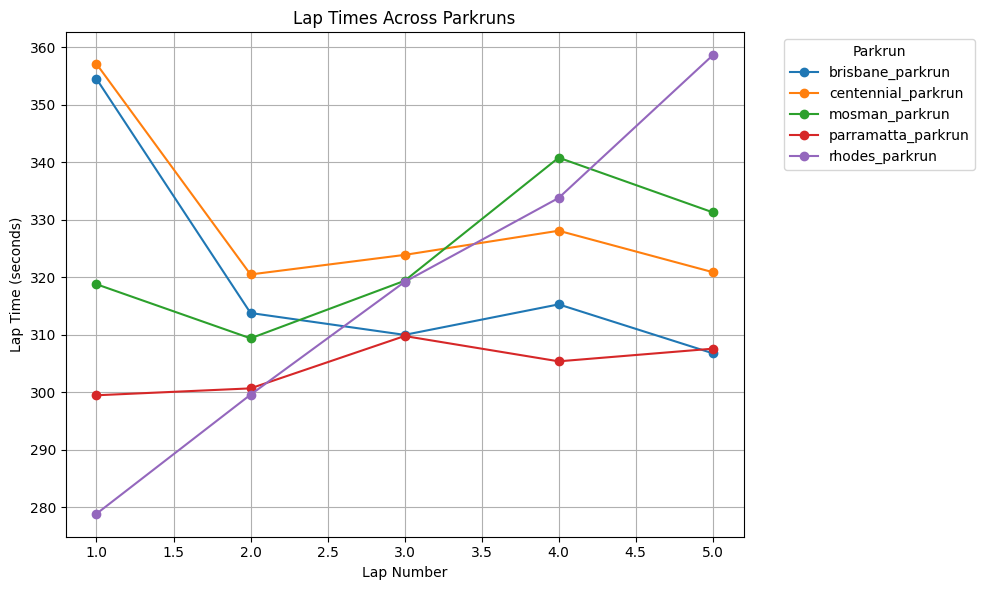

In [20]:
# Step 3: Sort for clean plotting
df_revised.sort_values(by=["Parkrun", "Lap"], inplace=True)

# Step 4: Line plot
plt.figure(figsize=(10, 6))
for name, group in df_revised.groupby("Parkrun"):
    plt.plot(group["Lap"], group["Lap Time (s)"], marker='o', label=name)

plt.title("Lap Times Across Parkruns")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.grid(True)
plt.legend(title="Parkrun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
